# EDA ( Exploratory Data Analysis )
## Student Performance
* Dataset: Student_Performance_1k.csv  : Bộ dữ liệu nhằm mục đích cung cấp cái nhìn sâu sắc về mối quan hệ giữa các biến dự đoán và chỉ số hiệu suất. Các nhà nghiên cứu và các nhà phân tích dữ liệu có thể sử dụng bộ dữ liệu này để khám phá tác động của giờ học, điểm số trước, hoạt động ngoại khóa, giờ ngủ và các câu hỏi mẫu về hiệu suất của học sinh.  
    - Hours Studied : Tổng số giờ học của mỗi học sinh.   
    - Previous Scores : Điểm số mà các sinh viên đạt được trong các bài kiểm tra trước.  
    - Extracurricular Activities : Học sinh tham gia vào các hoạt động ngoại khóa (có hay không).  
    - Sleep Hours : Số giờ ngủ trung bình mà học sinh có mỗi ngày.  
    - Sample Question Papers Practiced : Số lượng câu hỏi mẫu mà học sinh thực hành.  
    - Performance Index: Chỉ số thành tích thể hiện kết quả học tập của SV và đã được làm tròn đến số nguyên gần nhất. Chỉ số nằm trong khoảng từ 10 đến 100, với giá trị cao hơn cho thấy kết quả tốt hơn.  

- Central tendency of a distribution : xu hướng trung tâm của một phân phối  
- Measure of variation : Đo độ biến thiên  
- Skewness & Kurtosis : Đo Độ nghiên và độ nhọn  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

#### Bước 1: Xác định các biến và thuộc tính của biến (Variable Identification) trong EDA  

**1.Khái niệm**  

Xác định các biến (Variable Identification) là bước đầu tiên trong quá trình EDA (Exploratory Data Analysis), giúp hiểu rõ về cấu trúc dữ liệu và vai trò của từng biến trong tập dữ liệu. Việc này giúp ta phân loại biến, kiểm tra kiểu dữ liệu và xác định cách xử lý phù hợp.  
**2.Các loại biến trong dữ liệu**  
Các biến trong tập dữ liệu có thể được chia thành nhiều nhóm khác nhau:

**(a) Phân loại theo kiểu dữ liệu**  
* Biến số (Numerical Variables)  
    - Biến liên tục (Continuous Variables): Có thể nhận bất kỳ giá trị nào trong một phạm vi, ví dụ: giá nhà, diện tích, cân nặng.  
    - Biến rời rạc (Discrete Variables): Chỉ nhận giá trị nguyên, ví dụ: số phòng ngủ, số lượng sản phẩm.  
* Biến phân loại (Categorical Variables)  
    - Biến định tính danh mục (Nominal Variables): Không có thứ tự giữa các giá trị, ví dụ: màu sắc (đỏ, xanh, vàng), loại nhà (căn hộ, biệt thự).  
    - Biến định tính thứ tự (Ordinal Variables): Có thứ tự giữa các giá trị nhưng không có khoảng cách rõ ràng, ví dụ: xếp hạng đánh giá (kém, trung bình, tốt, xuất sắc).  
* Biến thời gian (Datetime Variables)  
    - Dữ liệu thời gian có thể là ngày tháng hoặc thời gian cụ thể, ví dụ: purchase_date, order_time.  
* Biến kiểu văn bản (Text Variables)  
    - Dữ liệu dạng văn bản.  

**(b) Phân loại theo vai trò trong mô hình**   
Biến mục tiêu (Target/Dependent Variable): Biến mà ta muốn dự đoán hoặc phân tích, ví dụ: price trong bài toán dự đoán giá nhà. Performance Index trong Student_Performance_1k.csv  
Biến độc lập (Independent Variables): Các biến có thể ảnh hưởng đến biến mục tiêu, ví dụ: sqft_living, bedrooms, location trong bài toán dự đoán giá nhà.  

In [2]:
# data = pd.read_csv("Student_Performance_1k.csv")
data = pd.read_csv("yellow_tripdata_2023-05.csv")


In [3]:
# Thông tin chung
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462171 entries, 0 to 462170
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Tech_Vendor            462171 non-null  object 
 1   tpep_pickup_datetime   462171 non-null  object 
 2   tpep_dropoff_datetime  462171 non-null  object 
 3   passenger_count        462171 non-null  int64  
 4   trip_distance          462171 non-null  float64
 5   Ratecode               462171 non-null  object 
 6   payment_type           462171 non-null  object 
 7   fare_amount            462171 non-null  float64
 8   extra                  462171 non-null  float64
 9   mta_tax                462171 non-null  float64
 10  tip_amount             462171 non-null  float64
 11  tolls_amount           462171 non-null  float64
 12  improvement_surcharge  462171 non-null  float64
 13  total_amount           462171 non-null  float64
 14  congestion_surcharge   462171 non-nu

In [4]:
data.head()

,Tech_Vendor,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,Ratecode,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone
0,Creative Mobile Technologies LLC,1/05/2023 0:31,1/05/2023 0:49,1,3.6,Standard rate,Credit card,15.5,3.0,0.5,4.00,0.0,0.3,23.30,2.5,Manhattan,Lenox Hill East,Manhattan,East Chelsea
1,Creative Mobile Technologies LLC,1/05/2023 0:42,1/05/2023 1:04,1,5.6,Standard rate,Credit card,19.5,3.0,0.5,2.00,0.0,0.3,25.30,2.5,Manhattan,East Village,Queens,Sunnyside
2,Creative Mobile Technologies LLC,1/05/2023 0:39,1/05/2023 0:49,1,2.3,Standard rate,Cash,10.0,0.5,0.5,0.00,0.0,0.3,11.30,0.0,Manhattan,Upper West Side North,Manhattan,Hamilton Heights
3,Creative Mobile Technologies LLC,1/05/2023 0:56,1/05/2023 1:11,1,5.3,Standard rate,Cash,17.5,3.0,0.5,0.00,0.0,0.3,21.30,2.5,Manhattan,Lenox Hill West,Manhattan,Hamilton Heights
4,Creative Mobile Technologies LLC,1/05/2023 0:16,1/05/2023 0:29,1,4.4,Standard rate,Credit card,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,Manhattan,Penn Station/Madison Sq West,Manhattan,East Harlem South


**3. Xác định tự điển dữ liệu:**  
    - Hours Studied : Tổng số giờ học của mỗi học sinh. --> Kiểu numeric   
    - Previous Scores : Điểm số mà các sinh viên đạt được trong các bài kiểm tra trước. --> Kiểu numeric    
    - Extracurricular Activities : Học sinh tham gia vào các hoạt động ngoại khóa (có hay không). --> Categorical ->Nominal  
    - Sleep Hours : Số giờ ngủ trung bình mà học sinh có mỗi ngày. --> Kiểu numeric   
    - Sample Question Papers Practiced : Số lượng câu hỏi mẫu mà học sinh thực hành.--> Kiểu numeric    
    - Performance Index: Chỉ số thành tích thể hiện kết quả học tập của SV và đã được làm tròn đến số nguyên gần nhất. Chỉ số nằm trong khoảng từ 10 đến 100, với giá trị cao hơn cho thấy kết quả tốt hơn.--> Kiểu numeric  
    - Gender : Giới tính học sinh --> Categorical ->Nominal   

**==> Nếu kiểu dữ liệu trong dataframe không đúng với tự điển dữ liệu thì phải xử lý chuyển kiểu về cho đúng**

In [4]:
# Xem 5 dòng đầu tiên
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Gender
0,5,73,Yes,9,3,60,Female
1,3,75,Yes,5,9,57,Male
2,1,82,No,8,7,58,Male
3,1,82,No,8,7,58,Male
4,3,62,No,5,1,43,Female


**4.Xác định kiểu dữ liệu của thuộc tính:**

In [5]:
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = data.select_dtypes(include=['object']).columns
datetime_vars = data.select_dtypes(include=['datetime64']).columns

print("Biến số:", numerical_vars)
print("Biến phân loại:", categorical_vars)
print("Biến thời gian:", datetime_vars)

Biến số: Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
Biến phân loại: Index(['Extracurricular Activities', 'Gender'], dtype='object')
Biến thời gian: Index([], dtype='object')


In [6]:
data['Extracurricular Activities'].unique()

array(['Yes', 'No', nan], dtype=object)

In [7]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

**5.Xác định các thuộc tính ‘object’ và số lượng giá trị duy nhất:**  

In [8]:
object_columns = list(data.select_dtypes(['object']).columns)
object_columns

['Extracurricular Activities', 'Gender']

In [9]:
# Đếm số lượng giá trị duy nhất cho mỗi cột
for column in object_columns: 
    print("*, Column: ", column)   
    print(len(data[column].unique()), "unique values", "\t & \t", 
          data[column].notnull().sum(), "non-null values\t", 
          round(100* data[column].notnull().sum()/len(data[column]),2), "% non-null")    

*, Column:  Extracurricular Activities
3 unique values 	 & 	 997 non-null values	 99.7 % non-null
*, Column:  Gender
2 unique values 	 & 	 1000 non-null values	 100.0 % non-null


In [10]:
# Hoặc sử dụng describe(include="O") cho biến phân loại
data.describe(include="O")

,Extracurricular Activities,Gender
count,997,1000
unique,2,2
top,No,Female
freq,518,559


**6.Xác định biến kiểu numeric:**

In [11]:
# Danh sách các cột kiểu numeric
numeric_columns = list(data.select_dtypes(['number']).columns)
numeric_columns

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

In [12]:
# Đếm số lượng giá trị duy nhất cho mỗi cột
for column in numeric_columns: 
    print("*, Column: ", column)   
    print(len(data[column].unique()), "unique values", "\t & \t", 
          data[column].notnull().sum(), "non-null values\t", 
          round(100* data[column].notnull().sum()/len(data[column]),2), "% non-null")

*, Column:  Hours Studied
9 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  Previous Scores
61 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  Sleep Hours
8 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  Sample Question Papers Practiced
10 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  Performance Index
87 unique values 	 & 	 1000 non-null values	 100.0 % non-null


In [13]:
# Hoặc sử dụng describe() cho thuộc tính numeric
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.018000,70.539000,6.578000,4.555000,56.409000
std,2.574549,17.265184,2.608586,2.872495,19.512469
min,1.000000,29.000000,4.000000,0.000000,11.000000
25%,3.000000,56.000000,5.000000,2.000000,41.000000
50%,5.000000,71.000000,6.500000,5.000000,57.000000
75%,7.000000,86.000000,8.000000,7.000000,72.000000
max,9.000000,99.000000,60.000000,9.000000,100.000000


**7.Xác định biến mục tiêu (Biến Output):**  

In [14]:
# Thường căn cứ vào yêu cầu của bài toán
target_var = "Performance Index"  
print("Biến mục tiêu:", target_var)

Biến mục tiêu: Performance Index


**8.Xác định biến độc lập (Biến input):**  

In [15]:
independent_vars = [col for col in data.columns if col != target_var]
print("Biến độc lập:", independent_vars)

Biến độc lập: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Gender']


#### Bước 2:  Xử lý dữ liệu trùng, thiếu, ngoại lệ (Handle Missing Values):   
Sau khi xác định các biến trong dữ liệu, bước tiếp theo của EDA là xử lý dữ liệu bị trùng, dữ liệu bị thiếu và dữ liệu ngoại lệ. Đây là một bước quan trọng để đảm bảo chất lượng dữ liệu trước khi phân tích hoặc xây dựng mô hình.  

**1.Xử lý dữ liệu trùng (Duplicate Data):**  
Dữ liệu trùng lặp xảy ra khi một hoặc nhiều dòng dữ liệu giống nhau hoàn toàn hoặc gần như giống nhau, gây ảnh hưởng đến kết quả phân tích.  
Cú pháp : DataFrame.duplicated(subset=None, keep='first')  
- subset : Tên cột (hoặc danh sách cột) để kiểm tra trùng lặp. Mặc định là None, nghĩa là kiểm tra tất cả các cột.
- keep : Xác định giá trị nào được đánh dấu không trùng lặp:  
    • 'first' (mặc định): đánh dấu bản ghi đầu tiên là không trùng, các bản ghi sau là trùng.  
    • 'last': đánh dấu bản ghi cuối là không trùng, các bản ghi trước là trùng.  
    • False: đánh dấu tất cả bản ghi trùng là True.
    
Giá trị trả về :  
Trả về một Series boolean có cùng độ dài với DataFrame, đánh dấu True cho các bản ghi bị trùng lặp  

Hàm drop_duplicates() trong Pandas dùng để loại bỏ các bản ghi trùng lặp trong một DataFrame hoặc Series.  
DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)  
 - subset : Tên cột (hoặc danh sách cột) để xác định trùng lặp. Nếu là None (mặc định), sử dụng tất cả các cột.
 - keep : Xác định bản ghi nào được giữ lại:    
   • 'first' (mặc định): giữ lại bản ghi đầu tiên.  
   • 'last': giữ bản ghi cuối.  
   • False: loại bỏ tất cả bản ghi trùng lặp.  
 - inplace : Nếu là True, thay đổi trực tiếp trên DataFrame gốc mà không trả về bản sao mới.  
 - ignore_index : Nếu là True, đặt lại chỉ số (index) sau khi xóa trùng lặp.

Giá trị trả về:  
Trả về một DataFrame mới (trừ khi inplace=True) đã loại bỏ các dòng trùng lặp theo điều kiện.  



#### Dữ liệu ví dụ:  

In [16]:
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Alice', 'David', 'Bob'],
    'age': [25, 30, 25, 40, 35]
})
display(df)

,name,age
0,Alice,25
1,Bob,30
2,Alice,25
3,David,40
4,Bob,35


In [17]:
# Đánh dấu bản ghi đầu tiên là không trùng, các bản ghi sau là trùng. ( Trùng tất cả các cột )
df[df.duplicated(keep='first')]

,name,age
2,Alice,25


In [18]:
# Đánh dấu bản ghi cuối là không trùng, các bản ghi trước là trùng. ( Trùng tất cả các cột )
df[df.duplicated(keep='last')]

,name,age
0,Alice,25


In [19]:
# Đánh dấu tất cả bản ghi trùng là True.
df[df.duplicated(keep=False)]

,name,age
0,Alice,25
2,Alice,25


In [20]:
# Đánh dấu bản ghi đầu tiên là không trùng, các bản ghi sau là trùng. ( Trùng cột age )
df[df.duplicated(subset='age',keep='first')]

,name,age
2,Alice,25


In [21]:
# # Đánh dấu bản ghi cuối là không trùng, các bản ghi trước là trùng. ( Trùng cột age )
df[df.duplicated(subset='age',keep='last')]

,name,age
0,Alice,25


In [22]:
# Đánh dấu tất cả bản ghi trùng là True. ( Trùng cột age )
df[df.duplicated(subset='age',keep=False)]

,name,age
0,Alice,25
2,Alice,25


In [23]:
# Kết hợp với ~ để lọc ra các bản ghi không bị trùng:
df_unique = df[~df.duplicated()]
df_unique

,name,age
0,Alice,25
1,Bob,30
3,David,40
4,Bob,35


In [24]:
# Phát hiện dữ liệu trùng
df.duplicated().sum()

1

In [25]:
# Kiểm tra trùng lặp toàn bộ hàng (dựa vào tất cả các cột)
print(df.duplicated())

0    False
1    False
2     True
3    False
4    False
dtype: bool


In [26]:
# Loại bỏ dữ liệu trùng
print("Before:", len(df))
df = df.drop_duplicates()
print("After:", len(df))
display(df)

Before: 5
After: 4


,name,age
0,Alice,25
1,Bob,30
3,David,40
4,Bob,35


#### Dữ liệu bài học

In [14]:
# Phát hiện dữ liệu trùng
data.duplicated().sum()

2

In [15]:
# Loại bỏ dữ liệu trùng
print("Before:", len(data))
data = data.drop_duplicates()
print("After:", len(data))

Before: 1000
After: 998


**2.Xử lý dữ liệu thiếu (Missing Data):**  
Dữ liệu thiếu xảy ra khi một hoặc nhiều giá trị của biến không được ghi nhận, gây ảnh hưởng đến kết quả phân tích và mô hình.  
Lý do xuất hiện các giá trị bị thiếu có thể xảy ra ở hai giai đoạn:  
- Khai thác dữ liệu (Data Extraction): Có thể gặp vấn đề với quá trình trích xuất. Trong những trường hợp như vậy, chúng ta nên kiểm tra kỹ lại dữ liệu chính xác với người quản trị dữ liệu. Lỗi ở giai đoạn trích xuất dữ liệu thường dễ tìm và cũng có thể được sửa một cách dễ dàng.  
- Thu thập dữ liệu (Data collection): Những lỗi xảy ra tại thời điểm thu thập dữ liệu khó sửa hơn. Ví dụ: Thiếu do không thu thập được thông tin (người dùng không cung cấp thông tin thu nhập, tuổi...) 

#### Các kiểu xử lý dữ liệu bị thiếu 

#### Dữ liệu ví dụ:  

In [16]:
# Cho một dữ liệu ví dụ 
df = pd.DataFrame({
    'Gender': ['M', 'F', 'M', 'M', 'F', 'M', None, 'M'],
    'Manpower': [25, None, 33, None, 25, 29, 26, 32],
    'Sales': [343, 280, 332, 272, None, 326, 259, 297]
})
display(df)

,Gender,Manpower,Sales
0,M,25.0,343.0
1,F,NaN,280.0
2,M,33.0,332.0
3,M,NaN,272.0
4,F,25.0,NaN
5,M,29.0,326.0
6,None,26.0,259.0
7,M,32.0,297.0


**1- Loại bỏ dữ liệu bị thiếu (Drop missing value):**

In [17]:
# Xoá dòng nào có giá trị bị thiếu
# Tạo một DataFrame mới bỏ tất cả các hàng không đầy đủ
no_missing_values_rows = df.dropna(how='any')
print(no_missing_values_rows.shape)

(4, 3)


In [18]:
no_missing_values_rows

,Gender,Manpower,Sales
0,M,25.0,343.0
2,M,33.0,332.0
5,M,29.0,326.0
7,M,32.0,297.0


In [19]:
# Tạo một DataFrame mới bỏ tất cả các cột với các hàng không đầy đủ
no_missing_values_cols = df.dropna(how='any', axis=1)
print(no_missing_values_cols.shape)

(8, 0)


In [33]:
no_missing_values_cols

""
0
1
2
3
4
5
6
7


In [20]:
display(df)

,Gender,Manpower,Sales
0,M,25.0,343.0
1,F,NaN,280.0
2,M,33.0,332.0
3,M,NaN,272.0
4,F,25.0,NaN
5,M,29.0,326.0
6,None,26.0,259.0
7,M,32.0,297.0


**2-Sử dụng Mean/ Mode/ Median Imputation (Generalizer imputation)**  
 - Sử dụng mode đối với dữ liệu kiểu số rời rạc (Discrete) hoặc kiểu phân loại (Categorical)
 - Sử dụng mean, median đối với dữ liệu kiểu số liên tục (Continuous) --> Nếu có outlier thì không dùng mean mà dùng median

In [35]:
# Giá trị phổ biến trong cột Gender
Mode_gender = df.Gender.mode()[0]
Mode_gender

'M'

In [36]:
df.Gender.isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
Name: Gender, dtype: bool

In [37]:
# lấy index của dòng bị thiếu 
index_gender = df[df.Gender.isna()].index
index_gender

Int64Index([6], dtype='int64')

In [38]:
df['Gender'][index_gender] 

6    None
Name: Gender, dtype: object

In [39]:
# Cách 1
df['Gender'][index_gender] =df['Gender'][index_gender].fillna(Mode_gender)
df

,Gender,Manpower,Sales
0,M,25.0,343.0
1,F,NaN,280.0
2,M,33.0,332.0
3,M,NaN,272.0
4,F,25.0,NaN
5,M,29.0,326.0
6,M,26.0,259.0
7,M,32.0,297.0


In [40]:
df.loc[index_gender,'Gender']

6    M
Name: Gender, dtype: object

In [41]:
# Cách 2 
df.loc[index_gender,'Gender'] = Mode_gender
df

,Gender,Manpower,Sales
0,M,25.0,343.0
1,F,NaN,280.0
2,M,33.0,332.0
3,M,NaN,272.0
4,F,25.0,NaN
5,M,29.0,326.0
6,M,26.0,259.0
7,M,32.0,297.0


In [42]:
# Lấy index của Gender == 'M'
index_M = df.Gender[df.Gender == 'M']
index_M

0    M
2    M
3    M
5    M
6    M
7    M
Name: Gender, dtype: object

In [43]:
df['Manpower'][index_M.index]

0    25.0
2    33.0
3     NaN
5    29.0
6    26.0
7    32.0
Name: Manpower, dtype: float64

In [44]:
# Giá trị trung bình của Manpower
mean_M = df['Manpower'][index_M.index].mean()
mean_M

29.0

In [45]:
index_F = df.Gender[df.Gender == 'F']
index_F

1    F
4    F
Name: Gender, dtype: object

In [46]:
df['Manpower'][index_F.index]

1     NaN
4    25.0
Name: Manpower, dtype: float64

In [47]:
mean_F = df['Manpower'][index_F.index].mean()
mean_F

25.0

In [48]:
index_M_M = df.Manpower[(df.Gender == 'M') & (df.Manpower.isna())]
index_M_M

3   NaN
Name: Manpower, dtype: float64

In [49]:
index_F_M = df.Manpower[(df.Gender == 'F') & (df.Manpower.isna())]
index_F_M

1   NaN
Name: Manpower, dtype: float64

In [50]:
df['Manpower'][index_M_M.index] = mean_M
df['Manpower'][index_F_M.index] = mean_F
df

,Gender,Manpower,Sales
0,M,25.0,343.0
1,F,25.0,280.0
2,M,33.0,332.0
3,M,29.0,272.0
4,F,25.0,NaN
5,M,29.0,326.0
6,M,26.0,259.0
7,M,32.0,297.0


**3- Điền theo trường hợp tương tự (Similar case imputation)**

In [51]:
(df['Sales'].isna()) & (df['Gender']=='M')

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [52]:
# Similar case imputation for column Sales 
index_M = df[(df['Sales'].isna()) & (df['Gender']=='M')].index
index_M

Int64Index([], dtype='int64')

In [53]:
df.groupby('Gender').mean()

,Manpower,Sales
Gender,,
F,25.0,280.000000
M,29.0,304.833333


In [54]:
# Giá trị trung bình Sales của Gender == M
value_M = df.groupby('Gender').mean().iloc[1,1]
value_M

304.8333333333333

In [55]:
# Giá trị trung bình Sales của Gender == F
value_F = df.groupby('Gender').mean().iloc[0,1]
value_F

280.0

In [56]:
# Vị trí index của M và F mà Sales là None
index_M = df[(df['Sales'].isna()) & (df['Gender']=='M')].index
index_F = df[(df['Sales'].isna()) & (df['Gender']=='F')].index

In [57]:
index_M

Int64Index([], dtype='int64')

In [58]:
index_F

Int64Index([4], dtype='int64')

In [59]:
# Điền giá trị M
df['Sales'][index_M] = df['Sales'][index_M].fillna(value_M)

In [60]:
# Điền giá trị F
df['Sales'][index_F] = df['Sales'][index_F].fillna(value_F)

In [61]:
df

,Gender,Manpower,Sales
0,M,25.0,343.0
1,F,25.0,280.0
2,M,33.0,332.0
3,M,29.0,272.0
4,F,25.0,280.0
5,M,29.0,326.0
6,M,26.0,259.0
7,M,32.0,297.0


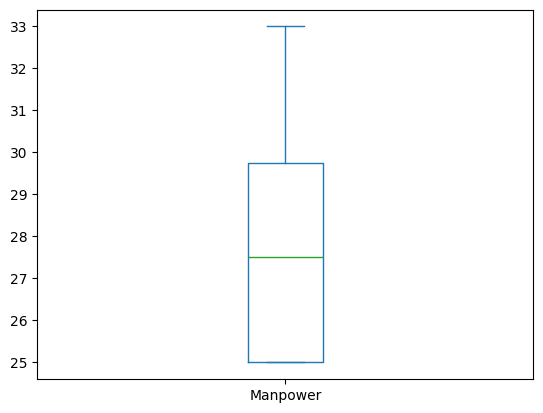

In [62]:
# Vẽ biểu đồ box plot  cột Manpower
df.Manpower.plot.box()
plt.show()

<Axes: >

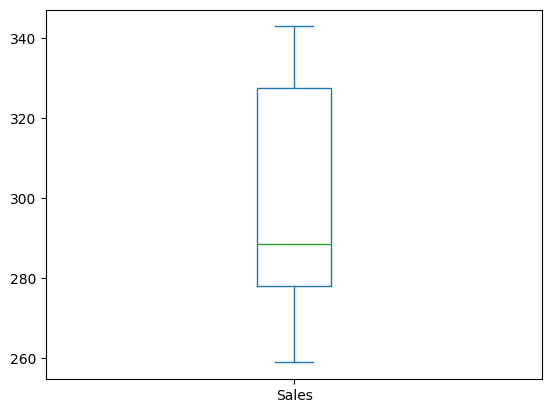

In [63]:
# Vẽ biểu đồ box plot  cột Sales
df.Sales.plot.box()

<Axes: >

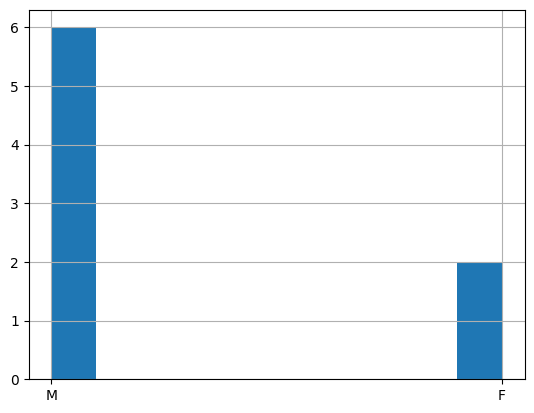

In [64]:
# Vẽ biểu đồ historam  cột Gender ( phân loại )
df.Gender.hist()

<Axes: xlabel='Manpower', ylabel='Sales'>

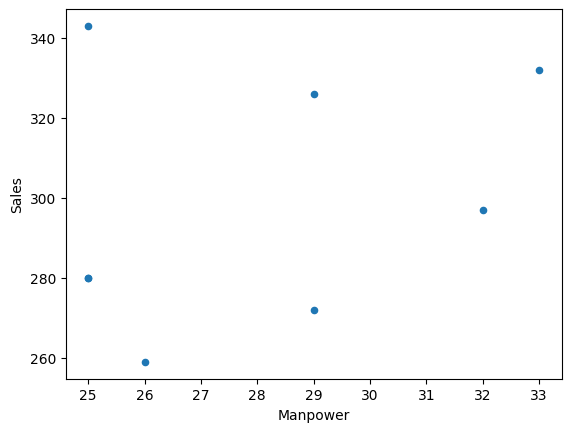

In [65]:
# Vẽ biểu đồ scatter plot 
df.plot.scatter(x = 'Manpower', y='Sales')

**4- Dùng Prediction Model để dự đoán giá trị bị thiếu ( Phương pháp cao cấp )**

In [66]:
# Sử dụng interpolate() để nội suy tuyến tính cho các giá trị kiểu số đang thiếu , chỉ áp dụng trên cột số 
df.select_dtypes(include=['number']).interpolate()


,Manpower,Sales
0,25.0,343.0
1,25.0,280.0
2,33.0,332.0
3,29.0,272.0
4,25.0,280.0
5,29.0,326.0
6,26.0,259.0
7,32.0,297.0


#### Xử lý dữ liệu bị thiếu trong bài học

#### Loại bỏ dữ liệu bị thiếu  

In [67]:
print(data.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          3
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Gender                              0
dtype: int64


In [68]:
# Dữ liệu ở cột Extracurricular Activities bị thiếu (3 null)
print(data['Extracurricular Activities'].isnull().sum())

3


In [69]:
# Xóa mẫu (dòng) có dữ liệu thiếu ( trên bảng view chưa xoá bản gốc)
print("Before:", len(data))
data_no_missing = data.dropna()
print("After:", len(data_no_missing))

Before: 998
After: 995


In [70]:
print(data.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          3
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Gender                              0
dtype: int64


In [71]:
# Các giá trị duy nhất 
data['Extracurricular Activities'].unique()

array(['Yes', 'No', nan], dtype=object)

In [72]:
# Đếm các giá trị 
data['Extracurricular Activities'].value_counts()

No     517
Yes    478
Name: Extracurricular Activities, dtype: int64

In [73]:
data['Extracurricular Activities'].describe()

count     995
unique      2
top        No
freq      517
Name: Extracurricular Activities, dtype: object

In [74]:
# Tìm loại xuất hiện nhiều nhất
mode_EA = data['Extracurricular Activities'].describe().top
mode_EA

'No'

In [75]:
# Điền giá trị này vào cho các cell đang thiếu của cột
data['Extracurricular Activities'] = data['Extracurricular Activities'].fillna(mode_EA)

In [76]:
print(data.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Gender                              0
dtype: int64


In [77]:
# Xem thống kê dữ liệu của cột vừa điền 
data['Extracurricular Activities'].describe()

count     998
unique      2
top        No
freq      520
Name: Extracurricular Activities, dtype: object

**3.Xử lý dữ liệu ngoại lệ:**  
- Ngoại lệ là mẫu ở xa, tách khỏi tổng thể
- Có thể có 2 loại ngoại lệ  
  + Ngoại lệ đơn biến (Univariate) : Có thể được tìm thấy khi chúng ta xem xét phân phối của một biến duy nhất --> thấy nằm xa với tổng thể  
  + Ngoại lệ đa biến (Multivariate): Là ngoại lệ trong không gian n chiều, ta phải xem xét bản phân phối nhiều chiều mới tìm thấy được ( ví dụ kết hợp cột giới tính : nam , và cột tình trạng - mang thai ==> là một ngoại lệ nếu xét riêng lẻ một biến thì không nhìn thấy....)
- Nguyên nhân ngoại lệ :
  + Các ngoại lệ có thể bị gây ra bởi lỗi thu thập hoặc xử lý dữ liệu : Nhập liệu 100.000 USD thành 1.000.000 USD....
  + Có thể là các phép đo chính xác nhưng dụng cụ đo lường bị lỗi : 10 máy cân có 1 máy bị lỗi...
  + Ngoại lệ do thử nghiệm : Cuộc chạy đua nước rút tại điểm xuất phát, có VĐV mất tập trung xuất phát sau --> thành tích kém...
  + Ngoại lệ có chủ ý : Điều tra thanh niên uống rượu nhưng bị che dấu số liệu thực sự, giấu thành tích....
  + Lỗi do xử lý dữ liệu : Lỗi trong quá trình trích xuất dữ liệu từ nghiều nguồn khác nhau....
  + Lỗi do lấy mẫu : Đo chiều cao vận động viên thường chung với VĐV bóng rổ .....
  + Ngoại lệ tự nhiên không do con người tạo ra (nhân viên công ty 80 tuổi vẫn còn làm việc do là bảo vệ.....)

Trong những trường hợp mà bạn không nên bỏ ngoại lệ, bạn sẽ làm gì?  
Một lựa chọn là thử chuyển đổi. Biến đổi căn bậc hai và log đều kéo theo số lượng cao. Điều này có thể làm cho các giả định hoạt động tốt hơn nếu ngoại lệ là biến phụ thuộc và có thể giảm tác động của một điểm nếu ngoại lệ là biến độc lập.  

Một lựa chọn khác là thử một mô hình khác. Điều này nên được thực hiện một cách thận trọng, nhưng có thể là một mô hình phi tuyến tính phù hợp hơn. Ví dụ, trong ví dụ 3, có lẽ một đường cong hàm mũ phù hợp với dữ liệu còn nguyên vẹn.  

Bất cứ cách tiếp cận nào bạn thực hiện, bạn cần biết rõ dữ liệu của mình và khu vực nghiên cứu của bạn. Hãy thử các cách tiếp cận khác nhau, và xem cái nào có ý nghĩa lý thuyết.  


In [21]:
numeric_columns

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

<Axes: >

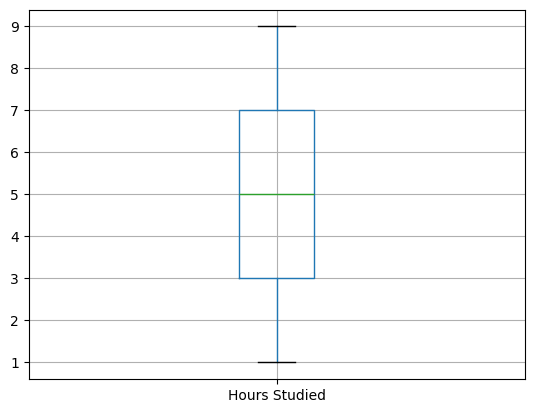

In [79]:
data.boxplot('Hours Studied')

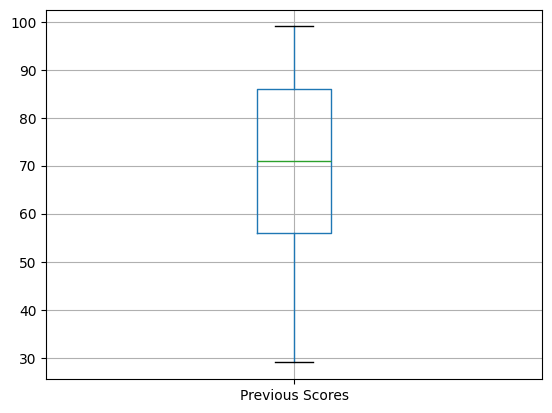

In [80]:
data.boxplot('Previous Scores')
plt.show()

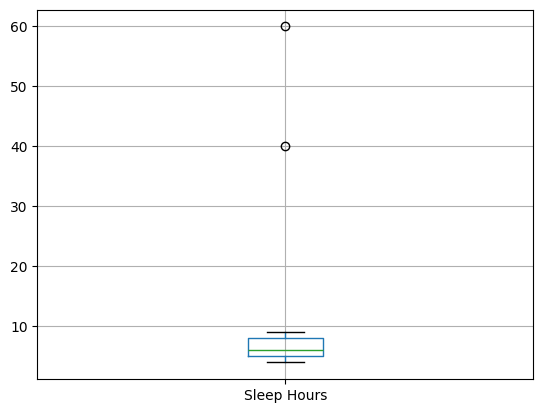

In [81]:
data.boxplot('Sleep Hours')
plt.show()

In [82]:
numeric_columns

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

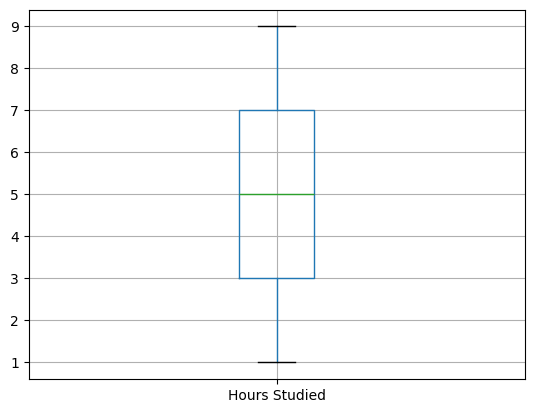

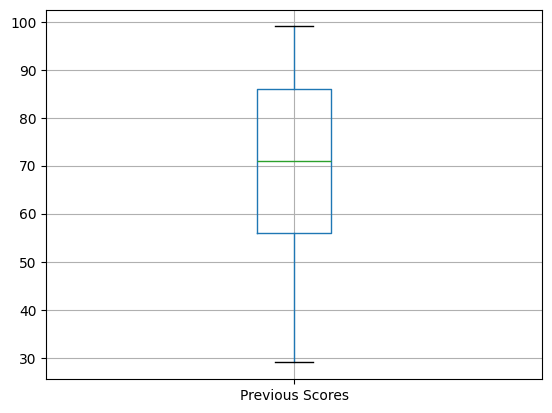

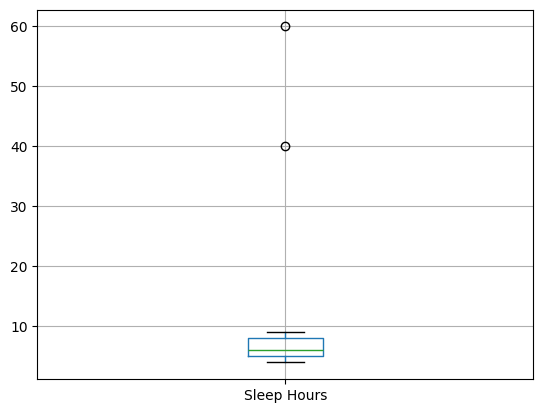

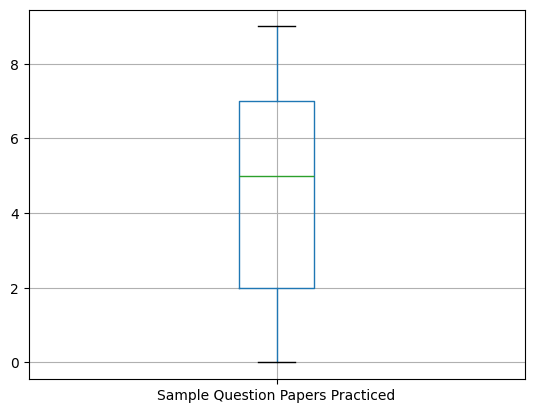

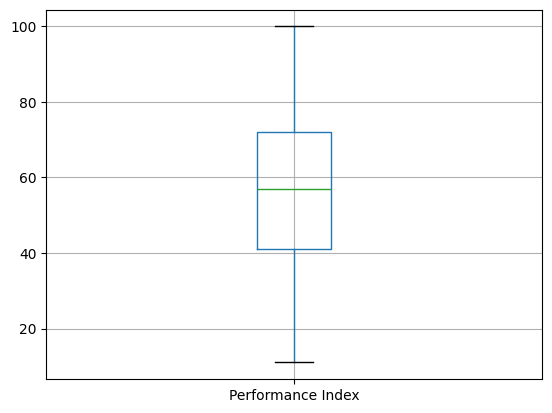

In [22]:
for column in numeric_columns:
    data.boxplot(column)
    plt.show()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     998 non-null    int64 
 1   Previous Scores                   998 non-null    int64 
 2   Extracurricular Activities        995 non-null    object
 3   Sleep Hours                       998 non-null    int64 
 4   Sample Question Papers Practiced  998 non-null    int64 
 5   Performance Index                 998 non-null    int64 
 6   Gender                            998 non-null    object
dtypes: int64(5), object(2)
memory usage: 62.4+ KB


In [85]:
from scipy.stats import stats
import numpy as np

#### Tìm ngoại lệ bằng IQR

In [86]:
Q1 = data['Sleep Hours'].quantile(0.25)
Q3 = data['Sleep Hours'].quantile(0.75)
IQR = Q3 - Q1

In [87]:
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)

Q1: 5.0 Q3: 8.0 IQR: 3.0


In [88]:
# Cách 1 :
# Khoảng dữ liệu không có outliers ==> đã loại outliers ra khỏi df 
df = data[(Q1 - 1.5 * IQR <= data['Sleep Hours']) & (data['Sleep Hours']<=Q3 + 1.5 * IQR)]
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Gender
0,5,73,Yes,9,3,60,Female
1,3,75,Yes,5,9,57,Male
2,1,82,No,8,7,58,Male
4,3,62,No,5,1,43,Female
5,2,76,Yes,6,7,56,Female
...,...,...,...,...,...,...,...
995,4,76,Yes,9,1,57,Female
996,2,57,No,5,5,35,Male
997,2,87,Yes,8,7,62,Female
998,1,53,No,8,0,24,Male


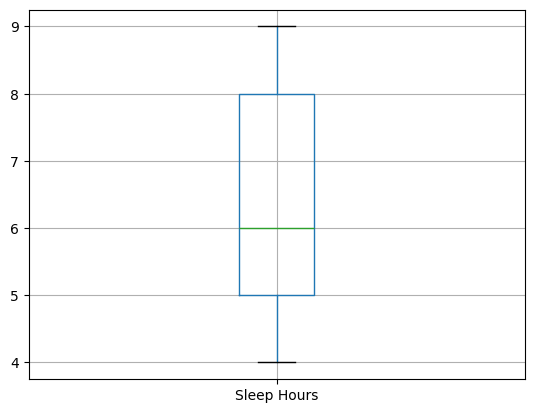

In [89]:
df.boxplot('Sleep Hours')
plt.show()

In [90]:
# Khoảng dữ liệu có chứa outliers ==> tách riêng outliers 
outliers = data[(Q1 - 1.5 * IQR > data['Sleep Hours']) | (data['Sleep Hours'] > Q3 + 1.5 * IQR)]
outliers

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Gender
7,4,97,No,40,1,81,Male
35,5,91,Yes,60,9,79,Male


In [91]:
# Cách 2 : Sử dụng hàm kiểm tra số lượng outlier
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Đếm ngoại lệ
    print('Kích thước dữ liệu không có outliers : ',len(data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]))
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)] # Trả về dữ liệu có chưa outlier

outliers = detect_outliers_iqr(data, "Sleep Hours")
print(outliers)

Kích thước dữ liệu không có outliers :  996
    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
7               4               97                         No           40   
35              5               91                        Yes           60   

    Sample Question Papers Practiced  Performance Index Gender  
7                                  1                 81   Male  
35                                 9                 79   Male  


In [92]:
# Kiểm tra outlier cho toàn bộ các biếm kiểu số 
for column in numeric_columns:
    outliers = detect_outliers_iqr(data,column)
    print('Coloumn : ', column ,'\n Outliers', outliers)

Kích thước dữ liệu không có outliers :  998
Coloumn :  Hours Studied 
 Outliers Empty DataFrame
Columns: [Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced, Performance Index, Gender]
Index: []
Kích thước dữ liệu không có outliers :  998
Coloumn :  Previous Scores 
 Outliers Empty DataFrame
Columns: [Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced, Performance Index, Gender]
Index: []
Kích thước dữ liệu không có outliers :  996
Coloumn :  Sleep Hours 
 Outliers     Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
7               4               97                         No           40   
35              5               91                        Yes           60   

    Sample Question Papers Practiced  Performance Index Gender  
7                                  1                 81   Male  
35                                 9                 79

In [93]:
# Cách 2 : Sử dụng hàm để loại bỏ outlier 
import numpy as np

def delete_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Loại bỏ ngoại lệ
    print('Kích thước dữ liệu không có outliers : ',len(data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]))
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)] # Trả về dữ liệu đã loại bỏ outlier

deleted_outlier = delete_outliers_iqr(data, "Sleep Hours")
print(deleted_outlier)

Kích thước dữ liệu không có outliers :  996
     Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                5               73                        Yes            9   
1                3               75                        Yes            5   
2                1               82                         No            8   
4                3               62                         No            5   
5                2               76                        Yes            6   
..             ...              ...                        ...          ...   
995              4               76                        Yes            9   
996              2               57                         No            5   
997              2               87                        Yes            8   
998              1               53                         No            8   
999              7               95                        Yes            5   

     Sa

In [94]:
# Cách 3 : 
# sh = Sleep Hours
sh = data['Sleep Hours'].values
print(len(sh))
outliers_ = np.unique(sh[[(n < Q1-1.5*IQR) | (n > Q3+1.5*IQR) for n in sh]])
indexes_ = [sh.tolist().index(i) for i in outliers_]
print("Index of outliers", indexes_)
print("Outlier values", sh[indexes_])


998
Index of outliers [6, 34]
Outlier values [40 60]


In [95]:
# [(n < Q1-1.5*IQR) | (n > Q3+1.5*IQR) for n in sh]

In [96]:
indexes_

[6, 34]

In [97]:
# Xử lý ngoại lệ được tìm ra ở cách dùng IQR
print("Before:", len(sh))
# Dữ liệu Sleep Hours không có chưa outliers
sh_now = [sh[i] for i in range(len(sh)) if i not in indexes_]
print("After:", len(sh_now))

Before: 998
After: 996


#### Bước 3: Phân tích đơn biến, hai biến

#### Phân tích đơn biến
(Univariate Analysis) trong EDA
Phân tích đơn biến (Univariate Analysis) là quá trình phân tích từng biến độc lập trong tập dữ liệu để hiểu được đặc điểm, phân bố và các giá trị bất thường của chúng. Mục tiêu của phân tích đơn biến là:  

* Kiểm tra sự phân bố dữ liệu  
* Xác định giá trị trung tâm và độ biến thiên  
* Nhận diện dữ liệu ngoại lệ (outliers)  
* Xác định kiểu dữ liệu (số hay phân loại) và ý nghĩa của chúng  


#### Xu hướng trung tâm  

In [98]:
# Xác định các biến (đã có ở bước trên) 
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = data.select_dtypes(include=['object']).columns
datetime_vars = data.select_dtypes(include=['datetime64']).columns

print("Biến liên tục:", numerical_vars)
print("Biến phân loại:", categorical_vars)
print("Biến thời gian:", datetime_vars)

Biến liên tục: Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
Biến phân loại: Index(['Extracurricular Activities', 'Gender'], dtype='object')
Biến thời gian: Index([], dtype='object')


#### a/ Biến liên tục :  
Phân tích từng biến trong danh sách Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index']  

==> Viết hàm tái sử dụng , đưa từng biến vào để phân tích  

In [99]:
# Previous Scores
data['Previous Scores'].describe()

count    998.000000
mean      70.528056
std       17.278668
min       29.000000
25%       56.000000
50%       71.000000
75%       86.000000
max       99.000000
Name: Previous Scores, dtype: float64

In [100]:
# Tứ phân vị 
# Q1 = np.quantile(data['Previous Scores'].dropna(), 0.25)
# Q3 = np.quantile(data['Previous Scores'].dropna(), 0.75)

Q1 = data['Previous Scores'].quantile(0.25)
Q3 = data['Previous Scores'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)

Q1: 56.0 Q3: 86.0 IQR: 30.0


In [101]:
# Giá trị lớn nhất   
data['Previous Scores'].max()

99

In [102]:
# Giá trị nhỏ nhất   
data['Previous Scores'].min()

29

In [103]:
# Phương sai 
data['Previous Scores'].var()

298.55237154348816

In [104]:
# Độ lệch chuẩn 
data['Previous Scores'].std()

17.27866810675777

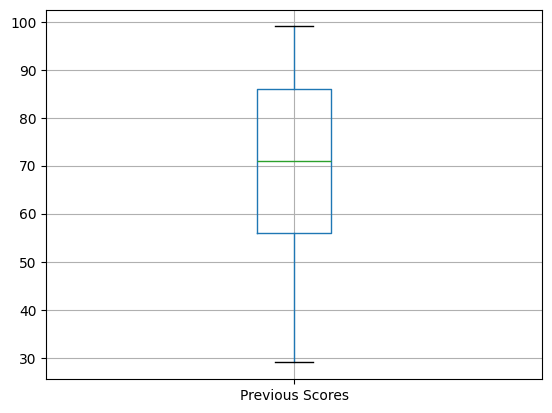

In [105]:
data.boxplot('Previous Scores')
plt.show()

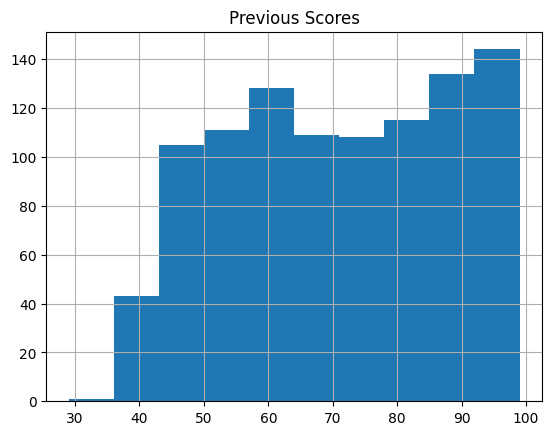

In [106]:
data.hist('Previous Scores')
plt.show()

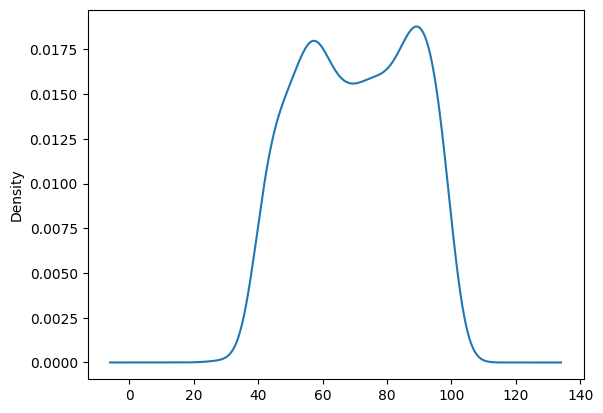

In [107]:
data['Previous Scores'].plot.kde()
plt.show()

#### Xu hướng phân tán  
Skewness đo lường mức độ lệch của phân phối dữ liệu so với phân phối chuẩn (normal distribution – đối xứng hoàn toàn).  
Skewness = 0: Dữ liệu đối xứng, phân phối chuẩn.  
Skewness > 0 (Lệch phải): Đuôi bên phải dài hơn, nhiều giá trị nhỏ, trung bình > trung vị.  
Skewness < 0 (Lệch trái): Đuôi bên trái dài hơn, nhiều giá trị lớn, trung bình < trung vị.  
Kurtosis đo mức độ tập trung của giá trị dữ liệu xung quanh trung tâm và mức độ nặng/nhẹ của các đuôi phân phối so với phân phối chuẩn.  
Kurtosis = 3 (hoặc 0 nếu tính theo excess kurtosis): Phân phối chuẩn.  
Kurtosis > 3: Phân phối nhọn (Leptokurtic) – nhiều giá trị gần trung tâm, đuôi dài → có nhiều ngoại lệ (outliers).  
Kurtosis < 3: Phân phối bè (Platykurtic) – dữ liệu phân tán, ít giá trị tập trung, đuôi ngắn.  

In [138]:
# Độ lệch 
stats.skew(data['Previous Scores']) # Phân phối hơi lệch trái

-0.060033895152476965

In [109]:
stats.kurtosis(data['Previous Scores']) # Độ nhọn phân phối , Phân phối thấp hơn phân phối chuẩn 

-1.2116688130267925

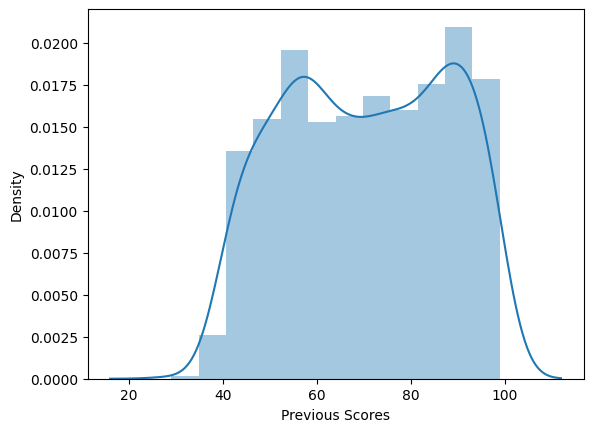

In [110]:
import seaborn as sns
sns.distplot(data['Previous Scores'].dropna())
plt.show()

count    998.000000
mean       5.022044
std        2.573984
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: Hours Studied, dtype: float64
Q1: 3.0 Q3: 7.0 IQR: 4.0
99
29


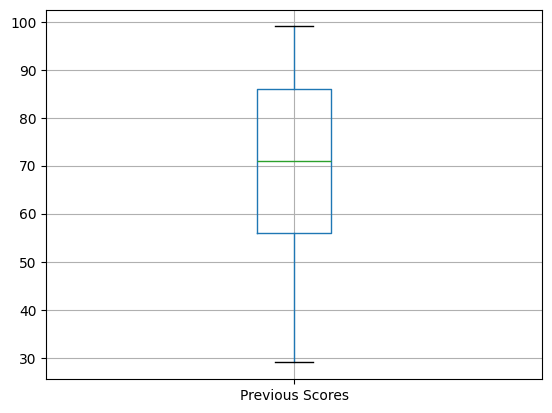

count    998.000000
mean      70.528056
std       17.278668
min       29.000000
25%       56.000000
50%       71.000000
75%       86.000000
max       99.000000
Name: Previous Scores, dtype: float64
Q1: 56.0 Q3: 86.0 IQR: 30.0
99
29


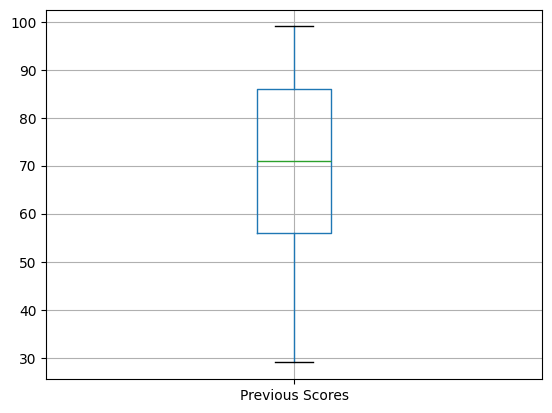

count    998.000000
mean       6.575150
std        2.610423
min        4.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       60.000000
Name: Sleep Hours, dtype: float64
Q1: 5.0 Q3: 8.0 IQR: 3.0
99
29


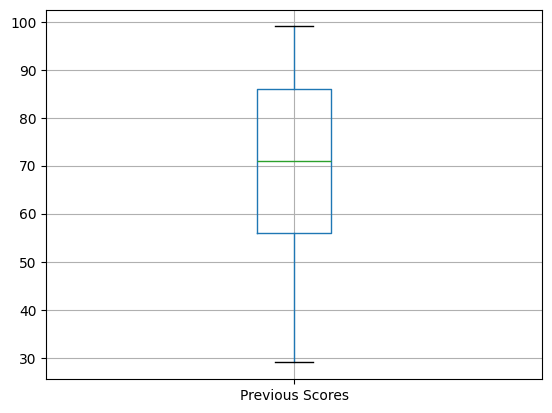

count    998.000000
mean       4.557114
std        2.870709
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: Sample Question Papers Practiced, dtype: float64
Q1: 2.0 Q3: 7.0 IQR: 5.0
99
29


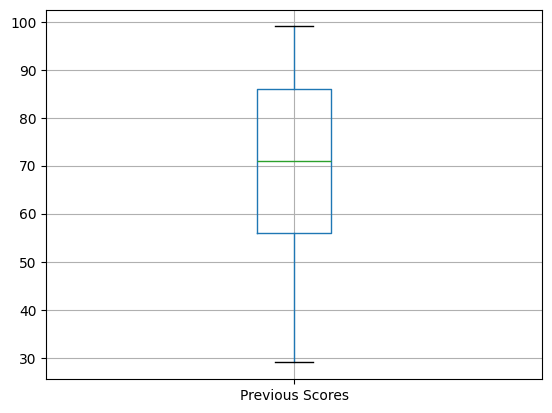

count    998.000000
mean      56.405812
std       19.531900
min       11.000000
25%       41.000000
50%       57.000000
75%       72.000000
max      100.000000
Name: Performance Index, dtype: float64
Q1: 41.0 Q3: 72.0 IQR: 31.0
99
29


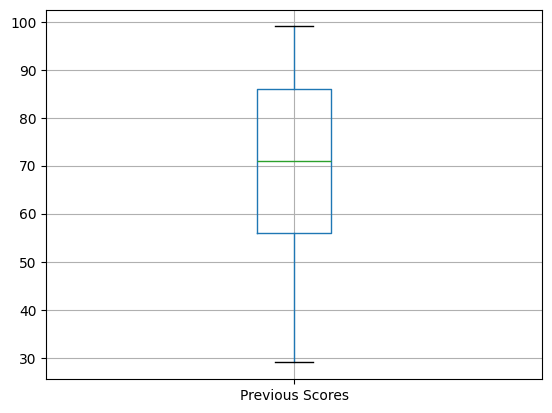

In [25]:
for column in numeric_columns:
    print(data[column].describe()) 
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)
    # Giá trị lớn nhất   
    print(data['Previous Scores'].max())
    print(data['Previous Scores'].min())
    data.boxplot('Previous Scores')
    plt.show()

#### b/ Biến phân loại  
Phân tích từng biến trong danh sách Index(['Extracurricular Activities', 'Gender']  
Dùng value_counts() và plot.bar() để phân tích  

In [26]:
data['Extracurricular Activities'].value_counts()

No     517
Yes    478
Name: Extracurricular Activities, dtype: int64

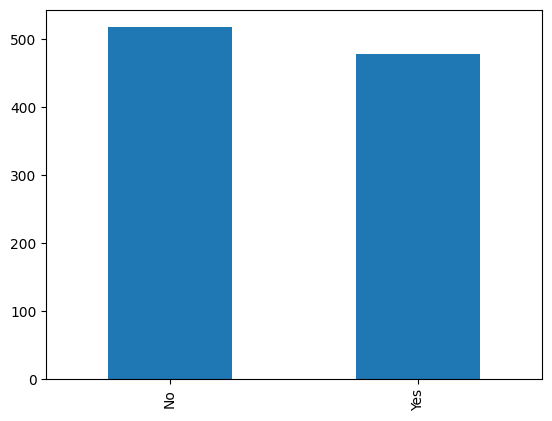

In [27]:
data['Extracurricular Activities'].value_counts().plot.bar()
plt.show()

In [113]:
# ==> Số lượng No nhiều hơn Yes 

In [28]:
# Biến 'Gender'
data['Gender'].value_counts()

Female    558
Male      440
Name: Gender, dtype: int64

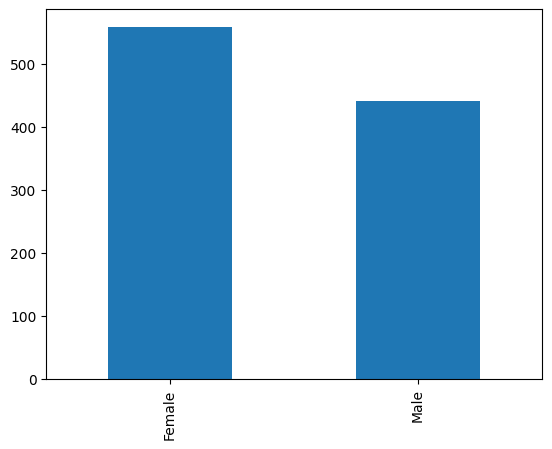

In [29]:
data['Gender'].value_counts().plot.bar()
plt.show()
# Số lượng Female nhiều hơn Male

#### c/ Biến mục tiêu:    
Phân tích biến mục tiêu Performance Index kiểu numeric như biến liên tục  

In [116]:
# Performance Index
data['Performance Index'].describe()

count    998.000000
mean      56.405812
std       19.531900
min       11.000000
25%       41.000000
50%       57.000000
75%       72.000000
max      100.000000
Name: Performance Index, dtype: float64

In [117]:
# Giá trị lớn nhất   
_max = data['Performance Index'].max()
# Giá nhỏ lớn nhất
_min = data['Performance Index'].min()
# Phương sai 
_var = data['Performance Index'].var()
# Độ lệch chuẩn 
_std = data['Performance Index'].std()
# Độ lệch phân phối 
_skew = stats.skew(data['Performance Index']) # Phân phối hơi lệch trái
# Độ nhọn phân phối 
_kur = stats.kurtosis(data['Performance Index']) # Phân phối thấp hơn phân phối chuẩn 

In [118]:
print(f'Giá trị lớn nhất : {_max}')
print(f'Giá trị nhỏ nhất : {_min}')
print(f'Phương sai : {_var}')
print(f'Độ lệch chuẩn : {_std}')
print(f'Độ lệch phân phối : {_skew}')
print(f'Độ nhọn phân phối : {_kur}')

Giá trị lớn nhất : 100
Giá trị nhỏ nhất : 11
Phương sai : 381.4951316876481
Độ lệch chuẩn : 19.531900360375793
Độ lệch phân phối : -0.09036867596247455
Độ nhọn phân phối : -0.8954261920381517


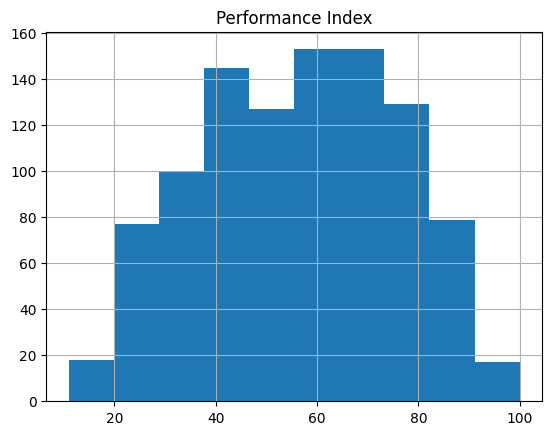

In [119]:
data.hist('Performance Index')
plt.show()

### Phân tích hai biến (Bivariate Analysis) trong EDA  
Phân tích hai biến (Bivariate Analysis) là quá trình kiểm tra mối quan hệ giữa hai biến trong tập dữ liệu. Mục tiêu của bước này là:  
✅ Xác định xem hai biến có mối quan hệ với nhau hay không  
✅ Xác định mức độ tương quan giữa hai biến  
✅ Kiểm tra xem sự thay đổi của một biến có ảnh hưởng đến biến kia không  

Tùy vào loại biến (số hoặc phân loại), ta sẽ sử dụng các phương pháp phân tích khác nhau.  

#### Liên tục với Liên tục

In [120]:
print("Biến liên tục:", numerical_vars)

Biến liên tục: Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [30]:
### Biến liên tục với biến liên tục 
data[['Previous Scores', 'Performance Index']].corr()

,Previous Scores,Performance Index
Previous Scores,1.000000,0.918304
Performance Index,0.918304,1.000000


### 📊 Ý nghĩa hệ số tương quan (Correlation Coefficient)

| Hệ số tương quan (r) | Mức độ tương quan            | Giải thích ngắn gọn                                    |
|----------------------|-------------------------------|--------------------------------------------------------|
| r ≈ +1               | Tương quan dương rất mạnh     | Khi biến X tăng thì biến Y cũng tăng gần như tuyệt đối |
| 0.7 ≤ r < 1          | Tương quan dương mạnh         | X và Y tăng cùng nhau rõ rệt                           |
| 0.3 ≤ r < 0.7        | Tương quan dương trung bình   | Có xu hướng tăng cùng nhau, nhưng không chặt chẽ       |
| 0.0 < r < 0.3        | Tương quan dương yếu          | Mối liên hệ rất yếu, gần như không đáng kể             |
| r = 0                | Không có tương quan           | Hai biến không liên hệ tuyến tính                      |
| -0.3 < r < 0.0       | Tương quan âm yếu             | Khi X tăng thì Y hơi giảm, nhưng rất yếu               |
| -0.7 < r ≤ -0.3      | Tương quan âm trung bình      | Có xu hướng ngược chiều nhau                           |
| -1 < r ≤ -0.7        | Tương quan âm mạnh            | X tăng thì Y giảm rõ rệt                               |
| r ≈ -1              | Tương quan âm rất mạnh        | Quan hệ nghịch biến gần như tuyệt đối                  |


In [122]:
# Nhận xét: Có sự tương quan mạnh giữa 'Previous Scores‘ và 'Performance Index' r > 0.9 

#### Phân loại với Phân loại

In [33]:
print("Biến phân loại:", categorical_vars)

Biến phân loại: Index(['Extracurricular Activities', 'Gender'], dtype='object')


In [34]:
table = pd.crosstab(data['Extracurricular Activities'], data['Gender'])
table

Gender,Female,Male
Extracurricular Activities,,
No,285,232
Yes,271,207


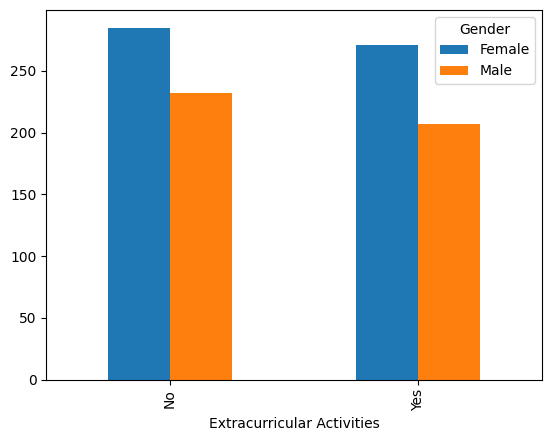

In [35]:
table.plot.bar()
plt.show()

In [126]:
# Nhận xét: Có sự khác biệt nhỏ về số lượng Male và Female giữa Extracurricular Activities No/Yes ,  
# Nữ hoạt động ngoại khoá và không hoạt động ngoại khoá nhiều hơn nam

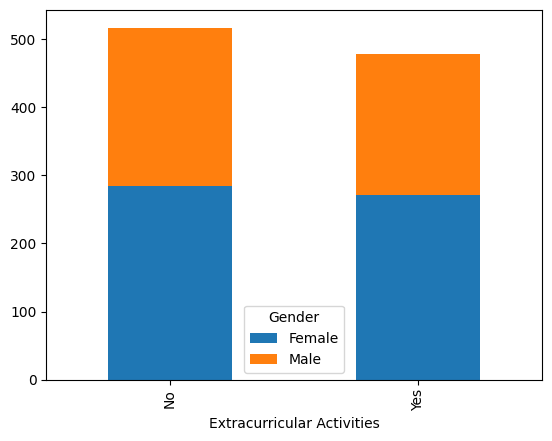

In [36]:
table.plot(kind='bar', stacked=True)
plt.show()

In [37]:
table.sum(axis=1)

Extracurricular Activities
No     517
Yes    478
dtype: int64

In [129]:
# (để mỗi thanh tăng tới 1 hoặc 100%)
# table.sum(axis=1) tính tổng các giá trị theo hàng.
# table.div(...) thực hiện phép chia từng giá trị trong table cho tổng tương ứng của hàng.
table_normalized = table.div(table.sum(axis=1), axis=0)
table_normalized

Gender,Female,Male
Extracurricular Activities,,
No,0.551923,0.448077
Yes,0.566946,0.433054


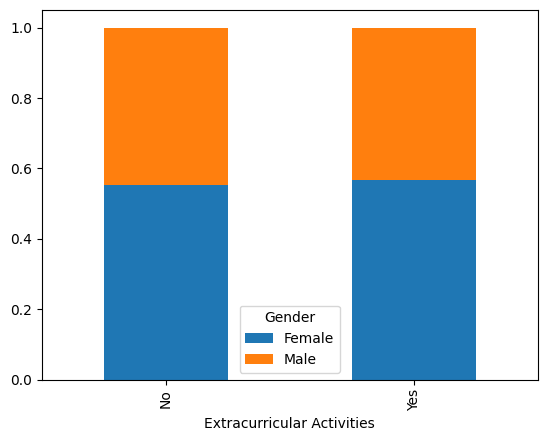

In [130]:
# Plot
table_normalized.plot(kind='bar', stacked=True)
plt.show()

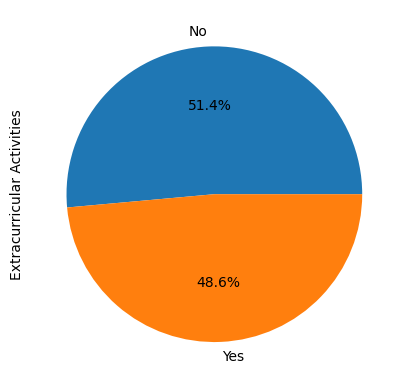

In [131]:
# # Female
data_female = data[data['Gender'] == 'Female']
# Count of each Extracurricular Activities
EA_counts = data_female['Extracurricular Activities'].value_counts()
EA_counts.plot(kind='pie', autopct='%1.1f%%')
plt.show()

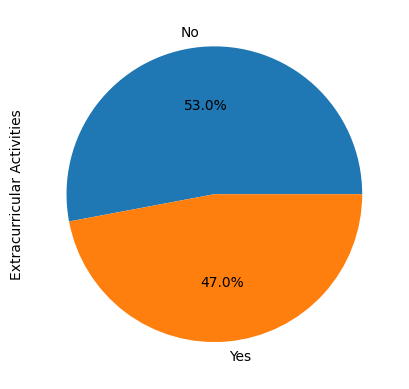

In [132]:
# # Male
data_male = data[data['Gender'] == 'Male']
# Count of each Extracurricular Activities
EA_counts = data_male['Extracurricular Activities'].value_counts()
EA_counts.plot(kind='pie', autopct='%1.1f%%')
plt.show()

#### Liên tục và phân loại

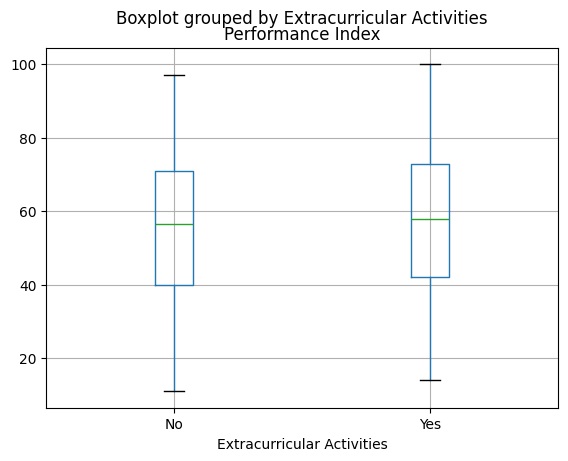

In [133]:
# Performance Index & Extracurricular Activities
data.boxplot(column='Performance Index', by='Extracurricular Activities')
plt.show()


In [134]:
# Có sự khác biệt nhỏ ở boxplot của Performance Index theo Extracurricular Activitie No và Yes  Extracurricular Activities sẽ ảnh hưởng ít đến Performance Index 
# Từ boxplot, chúng ta có thể thấy:
# Performance Index cho cả Extracurricular Activitie No và Yes không khác biệt nhiều, như được biểu thị bằng đường line trong mỗi hộp.
# Phạm vi Performance Index (từ tối thiểu đến tối đa trong phạm vi 1,5*IQR) cho cả Extracurricular Activitie No và Yes khác nhau ít
# Phạm vi box (IQR) không khác biệt nhiều.
# Những quan sát này cung cấp hiểu biết chung về phân phối Performance Index theo Extracurricular Activitie trong bộ dữ liệu này. 
# Chú ý: những thông tin chi tiết này dựa trên tập dữ liệu được cung cấp, không đại diện cho tổng thể lớn hơn.


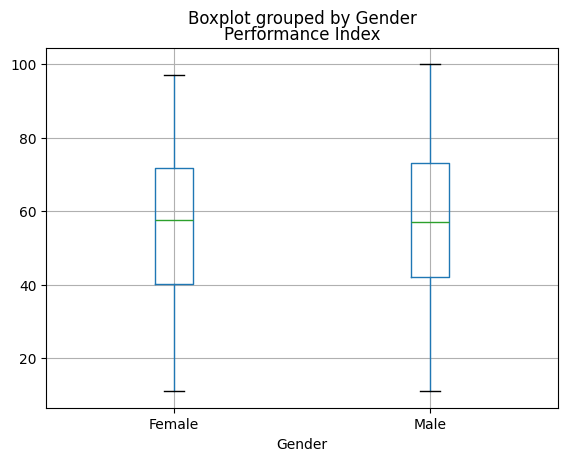

In [135]:
# Performance Index & Gender
data.boxplot(column='Performance Index', by='Gender')
plt.show()

In [144]:
data.count()

Hours Studied                       998
Previous Scores                     998
Extracurricular Activities          998
Sleep Hours                         998
Sample Question Papers Practiced    998
Performance Index                   998
Gender                              998
dtype: int64

#### Lưu dữ liệu đã xử lý 

In [137]:
data.to_csv('./data_da_xuly.csv')